In [33]:
import sklearn
import mglearn
from matplotlib import pyplot as plt
from numpy import ravel
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

X, y=make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(X, y, random_state=42)

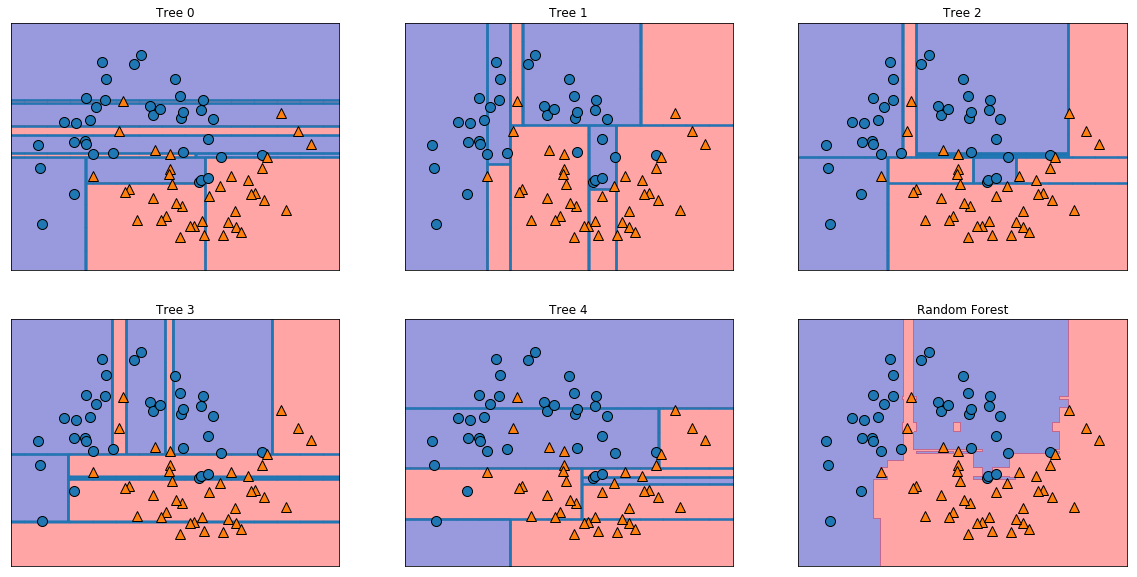

In [34]:
forest=RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

1.0
0.972027972027972


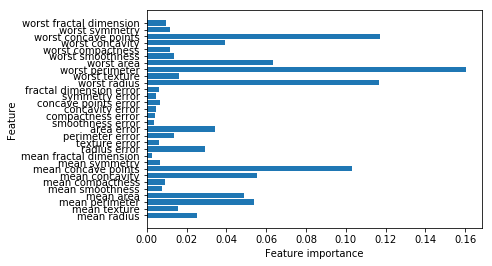

In [35]:
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(
cancer.data, cancer.target, random_state=0)

forest=RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))


def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(forest)